# Практическая работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 0381

Захаров Филипп и Странникова Наталья

Вариант №7

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

**Формула трапеций:**

$y_{n+1} = y_n + \frac12(s_n + s_{n+1})$, $y_0 = 0$

**Формула Симпсона:**

$y_{n+1} = y_{n-1} + \frac13(s_{n-1} + 4s_n + s_{n+1})$, $y_0 = 0$

**Формула прямоугольников:**

$y_{n+1} = y_n + s_{n+\frac12}$, $y_0 = 0$

**Формула 3/8:**

$y_{n+2} = y_{n-1} + \frac18(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$.

**Дискретный фильтр:**

Дискретный фильтр представляет собой ту или иную систему обработки дискретного сигнала, обладающую свойствами:
* линейности – выходная реакция системы на линейную комбинацию входных сигналов равна такой же линейной комбинации ее реакций на каждый из этих сигналов отдельности;
* стационарности — задержка входного сигнала приводит к такой же задержке выходного сигнала без изменения его формы.

Дискретный фильтр должен обладать «памятью» т.е каждый отсчет у(К) выходного сигнала определяется в результате обработки нескольких (более одного) отсчетов входного сигнала х(К)

Пусть последовательность {$x_k$} задает дискретный сигнал. Как и раньше, будем считать, что Т— шаг
дискретизации равен единице.

Обозначим выходной сигнал через {$y_k$}

Дискретный фильтр может быть задан в виде:

$y_k = b_0 x_k + b_1 x_{k-1} + ... + b_n x_{k-n} - a_1 y_{k-1} - a_2 y_{k-2} - ... - a_m y_{k-m}$. 

Здесь если все {$a_k = 0$} получим нерекурсивный фильтр. В противном случае — рекурсивный.

Ограничений на соотношение чисел m и n нет.

**Передаточная функция:**

$H(z) = {{b_0 + b_1 z^{-1} + b_2 z^{-2} + ... + b_n z^{-n}} \over {1 + a_1 z^{-1} + a_2 z^{-2} + ... + a_m z^{-m}}}$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#### 1. Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

Были выведены формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона.

##### Формула прямоугольников:

$$ y_{n+1} = y_n + s_{n+\frac12}, \quad y_0 = 0 $$

Пусть $ s_n = \exp(j \omega n) $ и $ y_n = H(\omega) \cdot \exp(j \omega n) $, тогда:

$$ \begin{cases}
    y_{n+1} &= H(\omega) \cdot e^{j \omega n} + e^{j\omega(n+1/2)} \\
    y_{n+1} &= H(\omega) \cdot e^{j \omega (n+1)} \\
\end{cases} $$

$ H(\omega)(e^{j\omega n} e^{j\omega}) = H(\omega) \exp(j \omega n) + e^{j\omega n} \cdot e^{\frac12 j\omega} $

$ H(\omega)(e^{j\omega n} e^{j\omega} - e^{j\omega n}) = e^{j\omega n} e^{\frac12 i\omega} $

$ H(\omega)(e^{j\omega} - 1) = e^{\frac12 j\omega} $

$ H(\omega) =  \frac1{\exp(i\omega/2) - \exp(i\omega/2)} =  \frac1{2j \sin\frac{\omega}2} $

$ \tilde H(f) = \frac1{2j\sin(\pi f)} $

Точное значение интеграла $ e^{j\omega t} $ равно $ \frac{e^{j\omega t}}{j\omega} $, тогда отношение значений:

$ \gamma = {{j \omega} \over {2i \sin{\omega \over 2}}} = {{\omega \over 2} \over \sin{\omega \over 2}} = 1 + {x^2 \over 24} + {{7x^4} \over 5760} + \dots $

$\gamma = {{\pi f} \over {\sin(\pi f)}} = 1 + {{\pi^2 f^2} \over 6} + {{7\pi^4 f^4} \over 360} + ...$

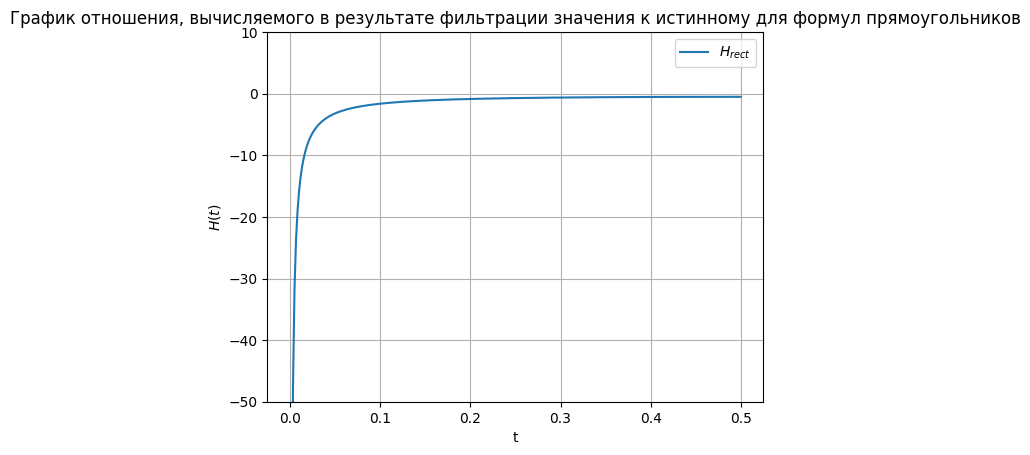

In [2]:
h_rect = lambda x: (1 / (2j * np.sin(math.pi*x))).imag
y_rect = lambda x: math.pi * x / (np.sin(math.pi * x))

t = np.linspace(1e-10, 0.5, 300)
plt.plot(t, h_rect(t), label=r'$H_{rect}$')
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -50, 10.))
plt.title("График отношения, вычисляемого в результате фильтрации значения к истинному для формул прямоугольников")
plt.grid()
plt.show()

Низкие частоты сильно усиливаются, а высокие незначительно подавляются.

##### Формула трапеций:

$$ y_{n+1} = y_n + \frac12(s_n + s_{n+1}), \quad y_0 = 0 $$

Пусть $s_n = e^{j\omega n}$ и $y_n = H(\omega) e^{j\omega n}$, тогда:

$$ \begin{cases}
    y_{n+1} = H(\omega) e^{j \omega n} + {{e^{j\omega n} + e^{j\omega(n+1)}} \over 2}\\
    y_{n+1} = H(\omega) e^{j\omega(n+1)}\\
\end{cases} $$

$H(\omega)(e^{j\omega n} e^{j\omega}) = H(\omega)e^{j\omega n} + e^{j\omega n} {{1 + e^{j\omega}} \over 2}$

$H(\omega)(e^{j\omega} - 1) = {{1 + e^{j\omega}} \over 2}$

$H(\omega) = {{1 + e^{j\omega}} \over {2(e^{j\omega} - 1)}} = {\cos{\omega \over 2} \over {2j\sin{\omega \over 2}}}$

$\tilde{H}(f) = {{\cos(\pi f)} \over {2j\sin(\pi f)}}$

Точное значение интеграла $e^{j\omega t}$ равно ${e^{j\omega t} \over {j\omega}}$, тогда отношение значений:

$\gamma = \cos{\omega \over 2} {{\omega \over 2} \over {\sin{\omega \over 2}}} = 1 - {\omega^2 \over 12} + {\omega^4 \over 720} + \dots$

$\gamma = \cos(\pi f) {{\pi f} \over {\sin(\pi f)}} = 1 - {{\pi^2 \omega^2} \over 3} + {{\pi^4 \omega^4} \over 45} + \dots$



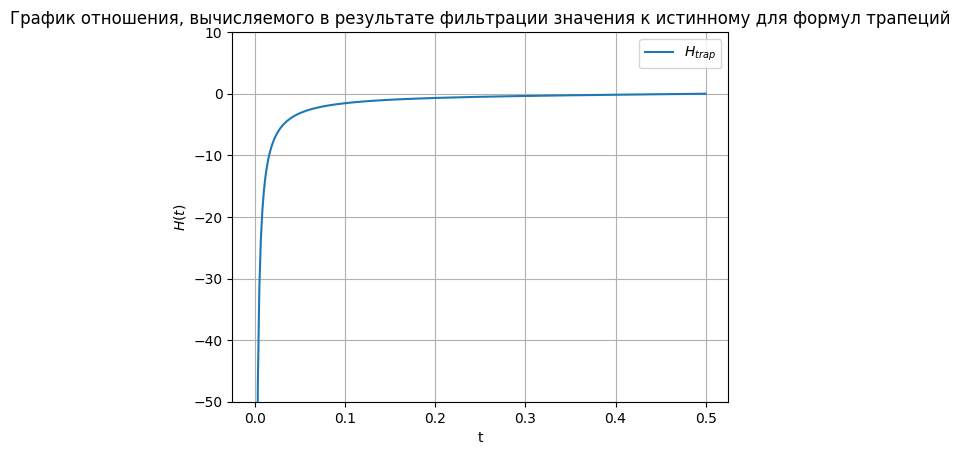

In [3]:
h_trap = lambda x: (np.cos(math.pi * x) / (2j * np.sin(math.pi * x))).imag
y_trap = lambda x: np.cos(math.pi * x) * (math.pi * x / np.sin(x * math.pi))

plt.plot(t, h_trap(t), label=r'$H_{trap}$')
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -50, 10.))
plt.grid()
plt.title("График отношения, вычисляемого в результате фильтрации значения к истинному для формул трапеций")
plt.show()

Низкие частоты усиливаются, а высокие подавляются.

##### Формула Симпсона:

$$ y_{n+1} = y_{n-1} + \frac13(s_{n-1} + 4s_n + s_{n+1}), \quad y_0 = 0 $$

Пусть $s_n = e^{j\omega n}$ и $y_n = H(\omega) e^{j\omega n}$, тогда:

$$ \begin{cases}
    y_{n+1} = H(\omega) e^{j \omega (n-1)} + \frac13(e^{j\omega (n-1)} + 4e^{j\omega n} + e^{j \omega (n+1)}) \\
    y_{n+1} = H(\omega) e^{j\omega(n+1)}\\
\end{cases} $$

$H(\omega)(e^{j\omega n} e^{j\omega}) = H(\omega)e^{j\omega n}e^{-j\omega} + e^{j\omega n} {{e^{-j\omega} + 4 + e^{i \omega}} \over 3}$

$H(\omega)(e^{j\omega} - e^{-j\omega}) = {{e^{-j\omega} + 4  + e^{j\omega}} \over 3}$

$H(\omega) = {{e^{-j\omega} + 4 + e^{j\omega}} \over {3(e^{j\omega} - e^{-j\omega})}} = {{\cos\omega + 2} \over {3j\sin\omega}}$

$\tilde{H}(f) = {{\cos(2\pi f) + 2} \over {3j\sin(2 \pi f)}}$

Точное значение интеграла $e^{j\omega t}$ равно ${e^{j\omega t} \over {j\omega}}$, тогда отношение значений:

$\gamma = {{(\cos\omega + 2)j\omega} \over {3j\sin\omega}} = {{\cos\omega + 2} \over 3} \cdot {\omega \over {\sin\omega}} = 1 + {\omega^4 \over 180} + \dots$

$\gamma = {{\cos(2\pi f) + 2} \over 3} \cdot {{2\pi f} \over {\sin(2\pi f)}} = 1 + {{4\pi^4 f^4} \over 45} + ...$

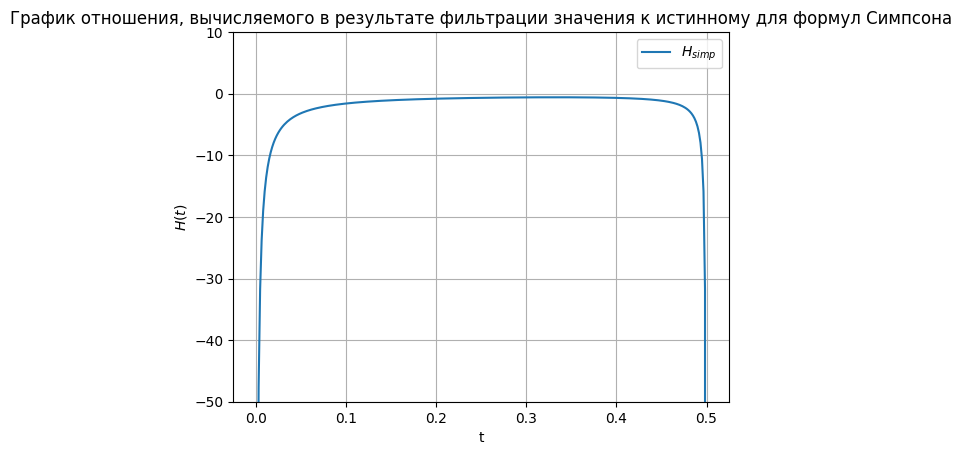

In [4]:
h_simp = lambda x: ((np.cos(2 * math.pi * x) + 2)/(3j * np.sin(2 * math.pi * x))).imag
y_simp = lambda x: ((np.cos(2 * math.pi * x) + 2) / 3) * 2 * math.pi * x / (np.sin(2 * math.pi * x))
plt.plot(t, h_simp(t), label=r'$H_{simp}$')
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -50, 10.))
plt.title("График отношения, вычисляемого в результате фильтрации значения к истинному для формул Симпсона")
plt.grid()
plt.show()

Происходит усиление низких и высоких частот. Наибольшее подавление достигается при частоте равной 1/3 частоты дискретизации.

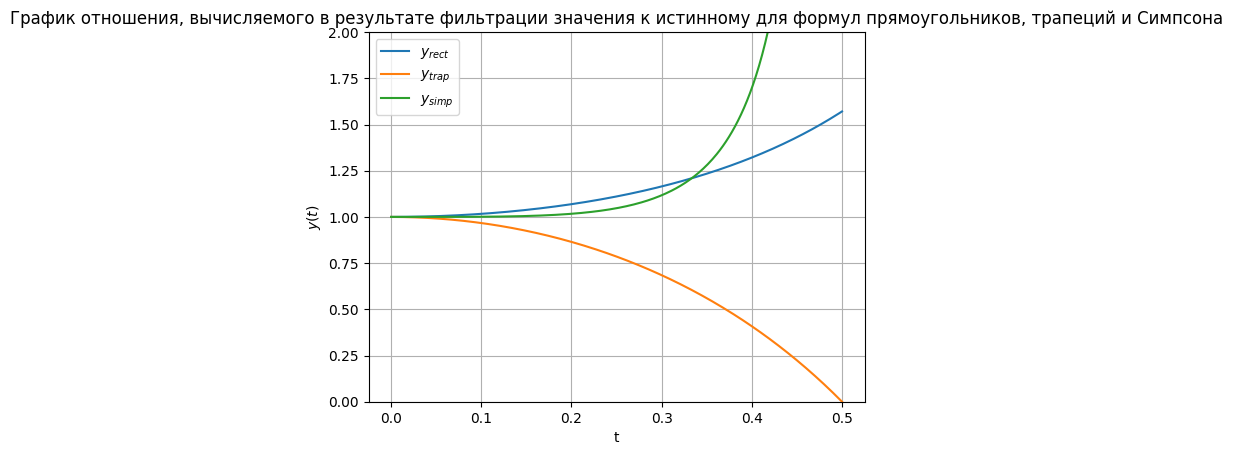

In [5]:
plt.plot(t, y_rect(t), label=r'$y_{rect}$')
plt.plot(t, y_trap(t), label=r'$y_{trap}$')
plt.plot(t, y_simp(t), label=r'$y_{simp}$')
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.ylim(0,2)
plt.legend()
plt.title("График отношения, вычисляемого в результате фильтрации значения к истинному для формул прямоугольников," 
          " трапеций и Симпсона")
plt.grid()
plt.show()

#### 2. Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8». Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

$$ y_{n+2} = y_{n-1} + {1 \over 8} (x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1}). $$

Пусть $s_n = e^{j\omega n}$ и $H(\omega)e^{j\omega n}$, тогда:

$$ \begin{cases}
    y_{n+2} = H(\omega) e^{j \omega (n-1)} + {{e^{j\omega (n+2)} + 3e^{j\omega (n+1)} + 3e^{j \omega n} + e^{j\omega (n-1)}} \over 8}\\
    y_{n+2} = H(\omega) e^{j\omega(n+2)}\\
\end{cases} $$

$H(\omega)(e^{j\omega n} e^{2j\omega}) = H(\omega)e^{j\omega n} e^{-j\omega} + e^{j\omega n} {{e^{2j\omega} + 3e^{j\omega} + 3 + e^{-j\omega}} \over 8}$

$H(\omega)(e^{2j\omega} - e^{-j\omega}) = {{e^{2j\omega} + 3e^{j\omega} + 3 + e^{-j\omega}} \over 8}$

$H(\omega) = {{e^{2j\omega} + 3e^{j\omega} + 3 + e^{-j\omega}} \over {8(e^{2j\omega} - e^{-j\omega})}} \cdot {{e^{-{j\omega} \over 2}} \over {e^{-{j\omega} \over 2}}}$

$H(\omega) = {{e^{{3j\omega} \over 2} + 3e^{{j\omega} \over 2} + 3e^{-{j\omega} \over 2} + e^{-{3j\omega} \over 2}} \over {8(e^{{3j\omega} \over 2} - e^{-{3j\omega} \over 2})}} = {{2\cos{{3\omega} \over 2} + 6 \cos{\omega \over 2} \over {16j\sin{{3\omega} \over 2}}}}$

$\tilde{H}(f) = {{\cos(3\pi f) + 3\cos(\pi f)} \over {8\sin(3\pi f)}}$

Точное значение интеграла $e^{j\omega t}$ равно ${{e^{j\omega t}} \over {j\omega}}$, тогда отношение значений:

$\gamma = \omega {{\cos{{3\omega} \over 2} + 3\cos{\omega \over 2}} \over {8\sin{{3\omega} \over 2}}} = {1 \over 12} (\cos{{3\omega} \over 2} + 3\cos{\omega \over 2}) \cdot {{{3\omega} \over 2} \over \sin{{3\omega} \over 2}} = {1 \over 3} + {\omega^4 \over 240} + \dots$

$\gamma = {1 \over 12}(\cos(3\pi f) + 3\cos(\pi f)){{3\pi f} \over \sin(3\pi f)} = {1 \over 3} + {{\pi^4 f^4} \over 15} + \dots$

Построим график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. 

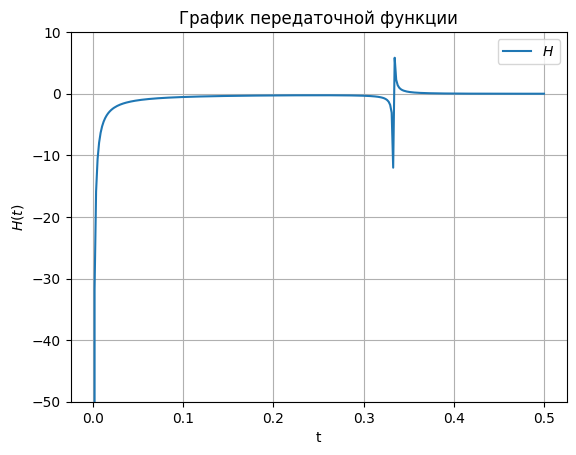

In [6]:
h = lambda x: ((np.cos(3 * math.pi * x) + 3 * np.cos(math.pi * x)) / (8j * np.sin(3 * math.pi * x))).imag
t = np.linspace(1e-10, 0.5, 300)
plt.plot(t, h(t), label=r'$H$', )
plt.xlabel('t')
plt.ylabel(r'$H(t)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -50, 10.))
plt.title("График передаточной функции")
plt.grid()
plt.show()

При частоте, равной 1/3 частоты дискретизации происходит усиление сигнала до бесконечности и смена знака. При низких частотах сигнал усиливается. На частотах выше 1/3 частоты дискретизации сигнал подавляется.

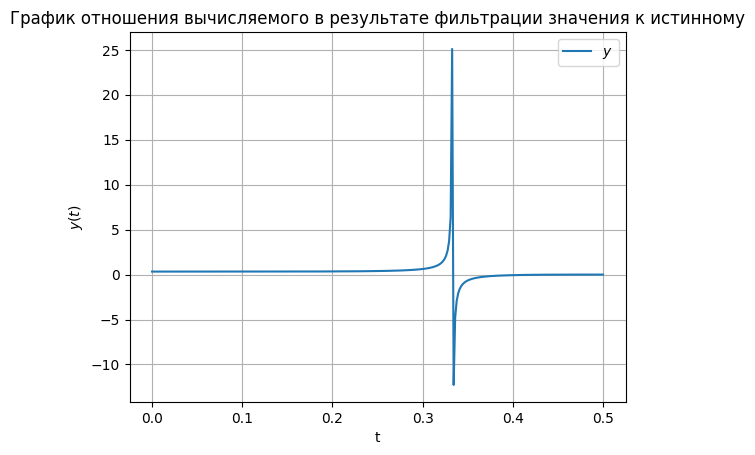

In [7]:
y = lambda x: (1 / 12) * (np.cos(3 * math.pi * x) + 3 * np.cos(math.pi * x)) * ((3 * math.pi * x) / np.sin(3 * math.pi * x))
plt.plot(t, y(t), label=r'$y$')
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title("График отношения вычисляемого в результате фильтрации значения к истинному")
plt.grid()
plt.show()

#### 3. Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

Анализируя графики передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций, Симпсона, а также формуле для интегрирования «по правилу 3/8», можно сказать, что:

1. Формула трапеций приводит к подавлению высоких частот, а формулы прямоугольников и Симпсона усиливают высокие частоты.
2. С увеличением частоты точность интегрирования падает. При частоте близкой к частоте Найквиста наименьшее отклонение от истинного значения показывает формула прямоугольников, а наибольшее - формула Симпсона.
3. При частоте менее 1/3 частоты дискретизации наибольшую точность обеспечивает формула Симпсона.
4. При частоте, близкой к 1/3 частоты дискретизации точность интегрирования по формуле 3/8 стремительно падает.

## Выводы

При выполнении практической работы мы исследовали частотные характеристики передаточных функций для рекурсивных фильтров, связанных с квадратурными формулами (формулы прямоугольников, трапеции и Симпсона), а также с интегрированием по правилу 3/8. Мы вывели формулы для передаточных функций рекурсивных фильтров и построили соответствующие графики. Наши наблюдения показали, что использование формулы трапеции приводит к снижению высоких частот, в то время как формулы прямоугольников и Симпсона усиливают их. Интегрирование по правилу 3/8 дает достаточно точный результат, хотя его точность снижается с увеличением частоты.